In [10]:
import pandas as pd
df=pd.read_csv("diabetes.csv")

In [11]:
df.head()

,Glucose,BMI,Outcome
0,148,33.6,1
1,85,26.6,0
2,183,23.3,1
3,89,28.1,0
4,137,43.1,1


In [13]:
df.shape

(768, 3)

In [15]:
df.isnull().sum()

Glucose    0
BMI        0
Outcome    0
dtype: int64

In [18]:
X=df.iloc[:,:-1].to_numpy()
y=df.iloc[:,-1].to_numpy()

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

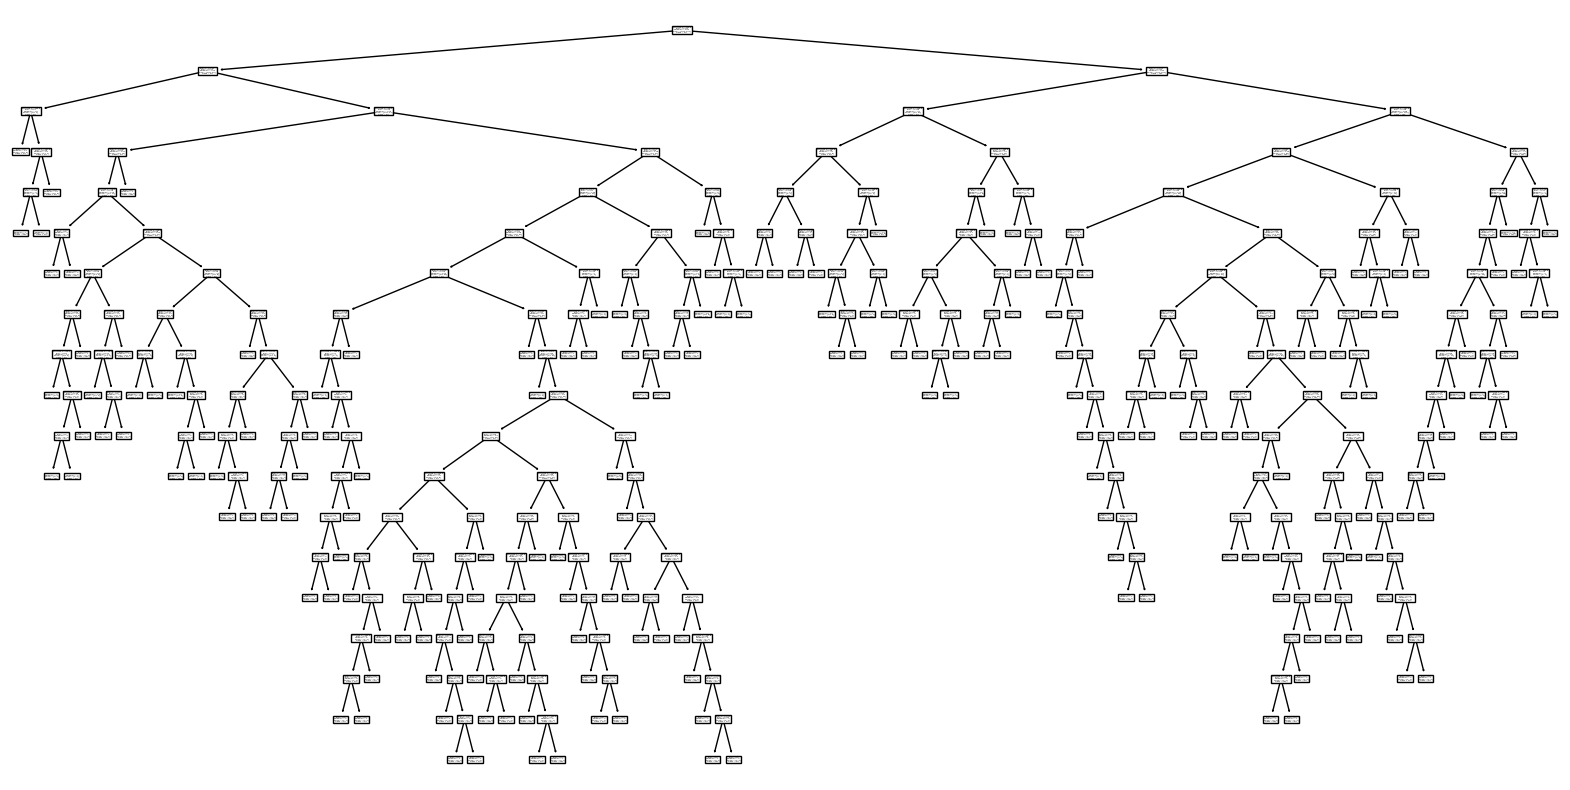

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf,feature_names=['Glucose','BMI'],class_names=['No','Yes'])
plt.show()

In [27]:
clf.set_params(max_depth=3)

DecisionTreeClassifier(max_depth=3, random_state=0)

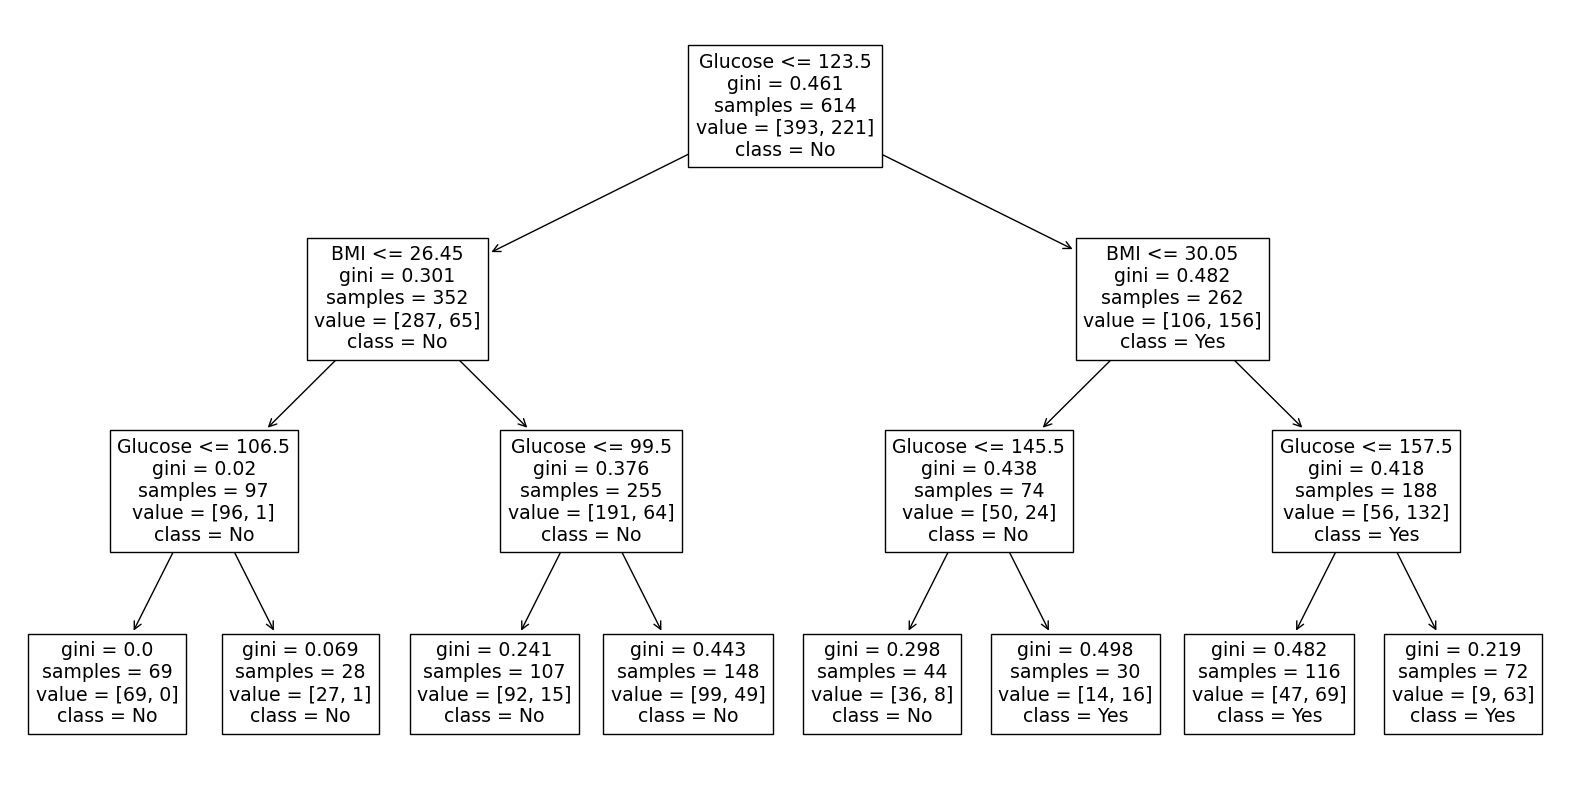

In [29]:
clf.fit(X_train,y_train)
plt.figure(figsize=(20,10))
plot_tree(clf,feature_names=['Glucose','BMI'],class_names=['No','Yes'])
plt.show()

In [31]:
predictions=clf.predict(X_test)

In [33]:
clf.predict([[90,20],[200,30]])

array([0, 1])

In [35]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(clf,X_train,y_train,cv=5,scoring='accuracy')
accuracy=scores.mean()
accuracy

0.7182993469278955

In [38]:
from sklearn import metrics
cf=metrics.confusion_matrix(y_test,predictions)
cf

array([[90, 17],
       [20, 27]])

In [40]:
tp=cf[1][1]
tn=cf[0][0]
fp=cf[0][1]
fn=cf[1][0]
print(f"tp:{tp}, tn:{tn},fp:{fp},fn:{fn}")

tp:27, tn:90,fp:17,fn:20


In [42]:
print("accuracy",metrics.accuracy_score(y_test,predictions))

accuracy 0.7597402597402597


In [44]:
print("Precision",metrics.precision_score(y_test,predictions))

Precision 0.6136363636363636


In [46]:
print("Recall",metrics.recall_score(y_test,predictions))


Recall 0.574468085106383


In [49]:
feature_importances = clf.feature_importances_
print("Feature importances:",feature_importances)

Feature importances: [0.74096359 0.25903641]
